# Exploring the CNOT-Gate

We saw that we could entangle the two qubits by placing the control qubit in the state $|+\rangle$/ But what happens if we put the second qubit in superposition? 

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex


In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In the circit above, we have the CNOT acting on the state: $|++\rangle = \frac{1}{2} (|00\rangle + |01\rangle + |10\rangle + |11\rangle$. Since CNOT swaps the amplitude of $|01\rangle$ and $11\rangle$ we see no change: 

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


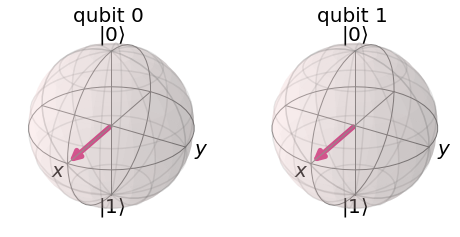

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())

svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
print(final_state)
plot_bloch_multivector(final_state)

In [4]:

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

The above creates the state:
$|-+\rangle = \frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)$

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

Statevector([ 0.5-6.123234e-17j,  0.5-6.123234e-17j, -0.5+6.123234e-17j,
             -0.5+6.123234e-17j],
            dims=(2, 2))


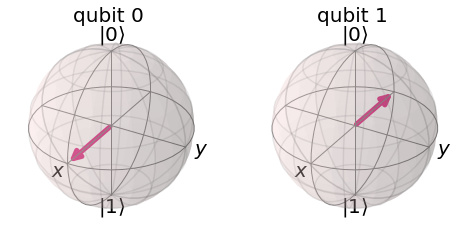

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# See the result
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
print(final_state)
plot_bloch_multivector(final_state)

If the CNOT acts on this state, we will swap the amilitudes of $|01\rangle$ and $|11\rangle$, resulting in $|--\rangle$

This is interesting, because it affects the state of the control qubit while leaving the state of the target qubit unchanged

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

Statevector([ 0.5-6.123234e-17j, -0.5+6.123234e-17j, -0.5+6.123234e-17j,
              0.5-6.123234e-17j],
            dims=(2, 2))


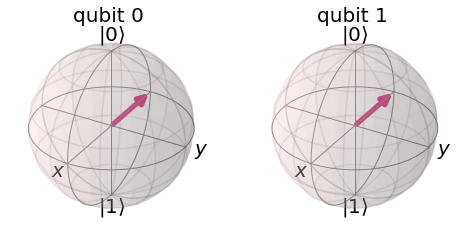

In [6]:
qc.cx(0,1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
print(final_state)
plot_bloch_multivector(final_state)

we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction. 

<img src = equiv.png width = 500/>

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
print(unitary)

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

Operator([[ 1.00000000e+00-1.22464680e-16j,
            1.23259516e-32+6.12323400e-17j,
           -7.85046229e-17+3.08148791e-32j,
            1.11022302e-16+6.12323400e-17j],
          [ 1.23259516e-32+6.12323400e-17j,
            1.00000000e+00-2.44929360e-16j,
            1.11022302e-16+6.12323400e-17j,
           -7.85046229e-17+2.46519033e-32j],
          [-1.11022302e-16+6.12323400e-17j,
            7.85046229e-17-3.69778549e-32j,
            1.57009246e-16+6.12323400e-17j,
            1.00000000e+00-3.67394040e-16j],
          [ 7.85046229e-17-1.84889275e-32j,
           -1.11022302e-16+6.12323400e-17j,
            1.00000000e+00-2.44929360e-16j,
           -1.57009246e-16+6.12323400e-17j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [8]:

qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
print(unitary)

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


# Phase Kickback

The identity 

<img src = equiv.png width = 500/> 


is an example of phase kickback, which s very important. Kickback is where the eigenvalue added by a gate to a qubit is kicked back into a different qubit via a controlled operation. For example, we saw that performing an X-gate on a $|-\rangle$ qubit gives it the phase -1:


Kickback is where the eigenvalue added by a gate to a qubit is 'kicked back' into a differetn qubit via a controlled operation. For example, we saw that performing X gate on a $|-\rangle$ qubit gives it phase -1.

$X|-\rangle = -|-\rangle$

When our control qubit is either $|0\rangle$ or $|1\rangle$, the phase affects the whole state, however it is a global phase and has no observable effects:

$CNOT|-0\rangle = |-\rangle \otimes |0\rangle = |-0\rangle$

$CNOT|-1\rangle = X|-\rangle \otimes |1\rangle = -|-\rangle \otimes |1\rangle = -|-1\rangle$

The interesting effect is when our control qubit is in superposition. The component of the control qubit that lies in the direction of $|1\rangle$ applies this phase factor to the corresponding target qubit. This applied phase factor in turn introduces a relative phase into the control qubit:

<img src = kickback.png width = 400/>

In [10]:

qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

The T-gate (phase gate) is:

$T(\phi)=\begin{bmatrix}1 & 0 \\ 0 & e^\frac{i\pi}{4}\end{bmatrix}$

Controlled T is:

<img src = control.png width = 400/>


In [12]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
print(unitary)

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

Operator([[1.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 1.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.        +0.j        ,
           1.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.70710678+0.70710678j]],
         input_dims=(2, 2), output_dims=(2, 2))


<img src = morekick.png width = 400/>
